In [1]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")

import os

print(root_dir)
import sys
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts"))


import numpy as np
import pandas as pd
from cov_functions import *
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression as lm
from scipy.stats import zscore
import bambi as bmb
import arviz as az
import bammm.bammm as mm
import matplotlib.pyplot as plt
import pingouin as pg
import sklearn
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts", "lib", "skggm", "inverse_covariance"))



import networkx as nx
import json
from itertools import product, combinations





no_trait_factors = 4
if no_trait_factors == 6:
        trait_factor_names = ["TF1_Self_Consciousness", "TF2_Positive", "TF3_Catastrophizing",  "TF4_Physiological_Anx",  "TF5_Depression",  "TF6_Cognitive_Anx"]
elif no_trait_factors==5:
    trait_factor_names = ["TF1_Worry", "TF2_Self_Worth", "TF3_Catastrophizing",  "TF4_Anxiety",  "TF5_Depression"]    
elif no_trait_factors==3:
        trait_factor_names = ["TF3_NegativeAffect", "TF2_PhysiolAnx", "TF1_CognAnxDepr"]
elif no_trait_factors==4:
        trait_factor_names = ["TF3_NegativeAffect", "TF2_PhysiolAnx", "TF1_CognAnxDepr","stai_ta"]
        #trait_factor_names_short = ["TF3", "TF2", "TF1","TA"]
        trait_factor_names_short = ["TF3", "TF2", "TF1"]
elif no_trait_factors==99:
    trait_factor_names = ["stai_ta", "sticsa_ta", "cat", "bdi"] 

mapdict = {'TF3_NegativeAffect': 'TF3',
        'TF2_PhysiolAnx': 'TF2', 
        'TF1_CognAnxDepr': 'TF1',
        'stai_ta': "TA",
        'covid_worry': 'Worry', 
        'prob_est': 'Probest',
        'q7_worry_econ_impact': 'EconWorr',
        'q6_apply_soc_dist': 'SocialDist',
        'q6_risk_group': 'RiskGr',
        'avoid_beh': 'AvoidBeh',
        'avoid_anx': 'AvoidAnx',
        'q6_media_freq_num': 'InforSeek',
        'q6_media_valence': 'MediaVal',
        'q7_period_rel_danger': 'DangerSate',
        'deaths': 'Deaths',
        'cases': 'Cases',
        'worryhealth': 'HealthWorry',
        'q6_work_home': "WorkHome",
        'sticsa_som_sa_currsess': "StateSomAnx",
    #    "q6_close_person_infdied": "ClosePDied",
        "covid_thoughts": "CovThoughts", 
        "memory_worry_infected_baselined": "MemWorry", 
        "memory_prob_infected_baselined": "MemProb", 

        #"affheallth-econ-worry": "Health>Econ \n worry", 
        #"covid_cases_est_diff": "Estimate of \n covid cases"
        }

vars = ["Worry", "Probest", "SocialDist", 
 "AvoidBeh", "AvoidAnx", "InforSeek", 
 "DangerSate", "Deaths", "WorkHome"]




#vars= ["F1_exposure_anxiety","F2_covid_worry", "F3_infection_probability",  
#                "F4_mixed_IS_closep", "F5_danger_perception", "F6_econ_worry", 
#                "F7_skepticism", "F8_time_end_estimates", "F9_avoidance", "Deaths","Cases"]

#vars = ["AvoidBeh","InforSeek", 
# "DangerSate", "Deaths", "Cases"]


#vars = ["Worry", "Probest", 
# "AvoidBeh", "AvoidAnx", "InforSeek", 
# "DangerSate", "Deaths","Cases"]

vars = ["AvoidBeh", "InforSeek", "Probest", 
        "DangerSate", "Deaths","Cases"]

#vars= ["F1_exposure_anxiety","F2_covid_worry", "F3_infection_probability",  
#                "F4_mixed_IS_closep", "F5_danger_perception", "F6_econ_worry", 
#                "F7_skepticism", "F8_time_end_estimates", "F9_avoidance", "Deaths","Cases"]

# load main dataset
df = pd.read_csv(os.path.join(root_dir, "data", "full_dataset_only_complete_based_on_sess_avg.csv"))
df["cases"] = df["cases14_std_unsmooth"]
df["deaths"] = df["deaths14_std_unsmooth"]

df=df.rename(columns=mapdict)
dfall = df.copy()

df.loc[:,vars] = df.loc[:,vars].apply(zscore, nan_policy='omit')
df = df.loc[:,vars+["PROLIFICID","session"]]
#tdf = df.pivot(columns="session", index="PROLIFICID", values=vars)


id_df = dfall.loc[:,["PROLIFICID","TF3", "TF2", "TF1", "TA"]].groupby(by=["PROLIFICID"]).mean()

/data/drive/postdoc/Project4_covid


In [2]:
tdf = df.loc[df["session"]==6,].drop(columns=["PROLIFICID", "session"])
tdf.values.shape
tdf.dropna().values.shape
tdf.columns

Index(['AvoidBeh', 'InforSeek', 'Probest', 'DangerSate', 'Deaths', 'Cases'], dtype='object')

Text(0.5, 1.0, 'precision')

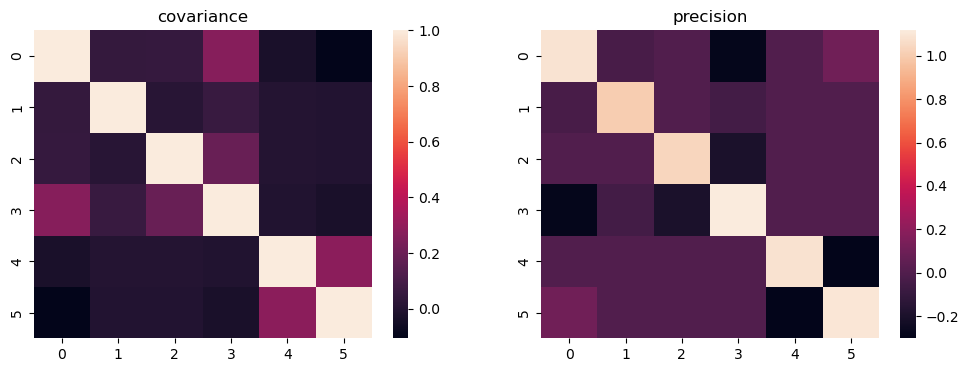

In [4]:

from inverse_covariance import QuicGraphicalLasso, QuicGraphicalLassoCV, QuicGraphicalLassoEBIC,AdaptiveGraphicalLasso,ModelAverage

model = QuicGraphicalLasso(
    lam=0.1,#int or np.ndarray,  # Graphical lasso penalty (scalar or matrix) 
    #mode='path'#str,               # 'default': single estimate
                            # 'path': use sequence of scaled penalties 
    #path=list,              # Sequence of penalty scales mode='path'
    #init_method=str,        # Initial covariance estimate: 'corrcoef' or 'cov'
    #auto_scale=bool,        # If True, scales penalty by 
                            # max off-diagonal entry of the sample covariance
)
m = model.fit(tdf.dropna().values)
f,ax = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(m.covariance_, ax=ax[0])
ax[0].set_title("covariance")
sns.heatmap(m.precision_, ax=ax[1])
ax[1].set_title("precision")

Next we can use CV to optimize the penalty parameter 

In [5]:
m.

{'Sigma0': None,
 'Theta0': None,
 'auto_scale': True,
 'init_method': 'corrcoef',
 'lam': 0.1,
 'max_iter': 1000,
 'method': 'quic',
 'mode': 'default',
 'path': None,
 'score_metric': 'log_likelihood',
 'tol': 1e-06,
 'verbose': 0}

Text(0.5, 1.0, 'precision')

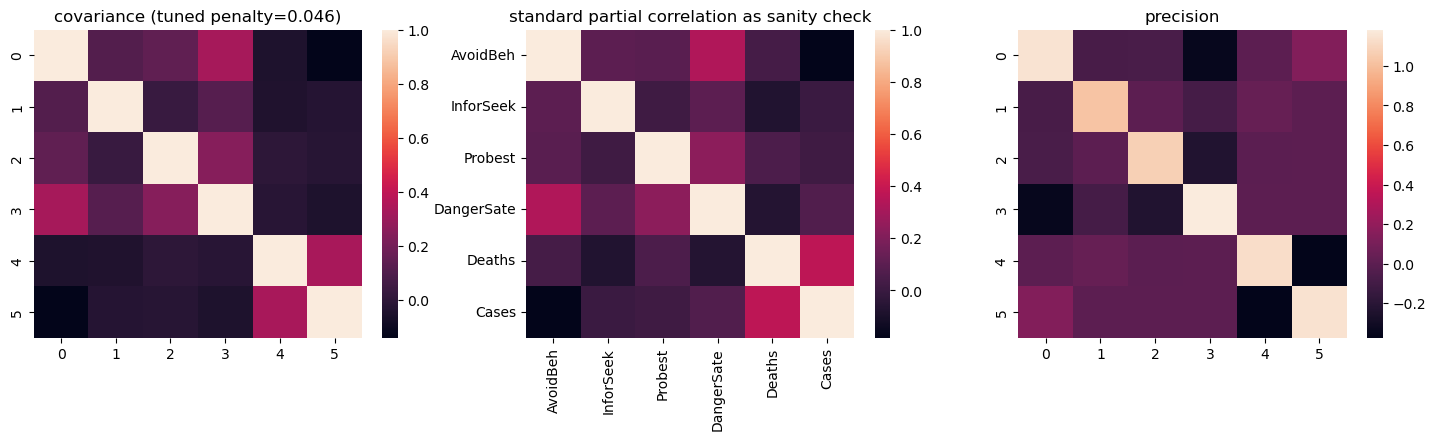

In [60]:
model = QuicGraphicalLassoCV(
    #lam = 0.1,#int or np.ndarray,  # Graphical lasso penalty (scalar or matrix) 
    cv = 10, 
    score_metric='log_likelihood', #'frobenius',#'log_likelihood', 

    #n_refinements=
    #mode='path'#str,               # 'default': single estimate
                            # 'path': use sequence of scaled penalties 
    #path=list,              # Sequence of penalty scales mode='path'
    #init_method=str,        # Initial covariance estimate: 'corrcoef' or 'cov'
    #auto_scale=bool,        # If True, scales penalty by 
                            # max off-diagonal entry of the sample covariance
)
m = model.fit(tdf.dropna().values)


# for comparsion calcualte partial correlation
pcor = tdf.pcorr().round(3)

f,ax = plt.subplots(1,3,figsize=(18,4))
sns.heatmap(m.covariance_, ax=ax[0])
ax[0].set_title("covariance (tuned penalty="+str(round(m.lam_,3))+")")

sns.heatmap(pcor, ax=ax[1])
ax[1].set_title("standard partial correlation as sanity check")

sns.heatmap(m.precision_, ax=ax[2])
ax[2].set_title("precision")

Next we can use EBIC to optimize the penalty parameter 

Text(0.5, 1.0, 'precision')

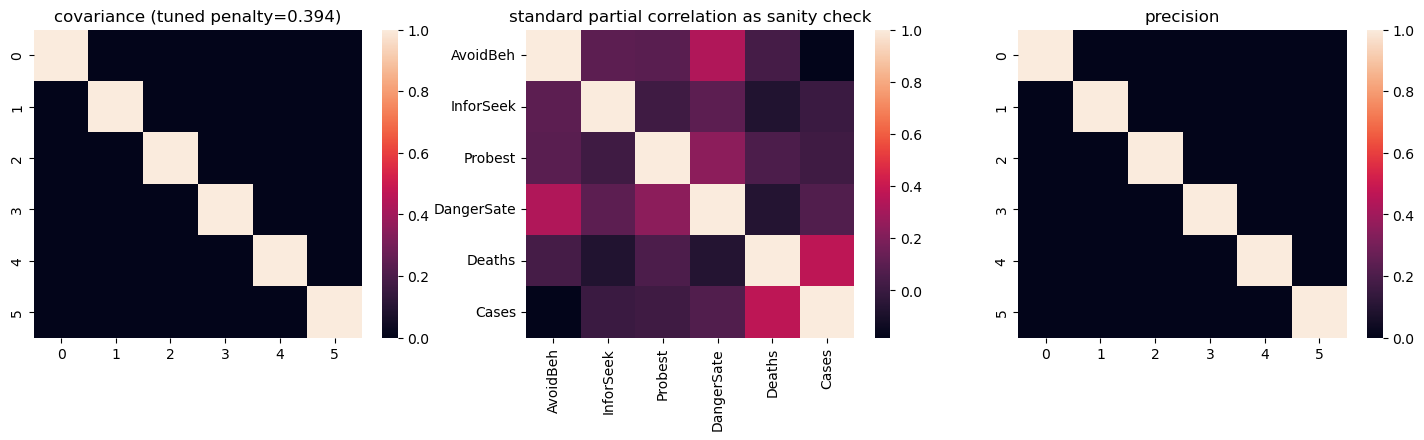

In [69]:
model = QuicGraphicalLassoEBIC(
    #lam = 0.05,#int or np.ndarray,  # Graphical lasso penalty (scalar or matrix) 
    #cv = 10, 
    gamma=0.8,
    score_metric='log_likelihood', #'frobenius',#'log_likelihood', 

    #n_refinements=
    #mode='path'#str,               # 'default': single estimate
                            # 'path': use sequence of scaled penalties 
    #path=list,              # Sequence of penalty scales mode='path'
    #init_method=str,        # Initial covariance estimate: 'corrcoef' or 'cov'
    #auto_scale=bool,        # If True, scales penalty by 
                            # max off-diagonal entry of the sample covariance
)
m = model.fit(tdf.dropna().values)


# for comparsion calcualte partial correlation
pcor = tdf.pcorr().round(3)

f,ax = plt.subplots(1,3,figsize=(18,4))
sns.heatmap(m.covariance_, ax=ax[0])
ax[0].set_title("covariance (tuned penalty="+str(round(m.lam_,3))+")")

sns.heatmap(pcor, ax=ax[1])
ax[1].set_title("standard partial correlation as sanity check")

sns.heatmap(m.precision_, ax=ax[2])
ax[2].set_title("precision")

In [73]:
df["session"].unique()
np.arange(2,21)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

Text(0.5, 1.0, 'precision')

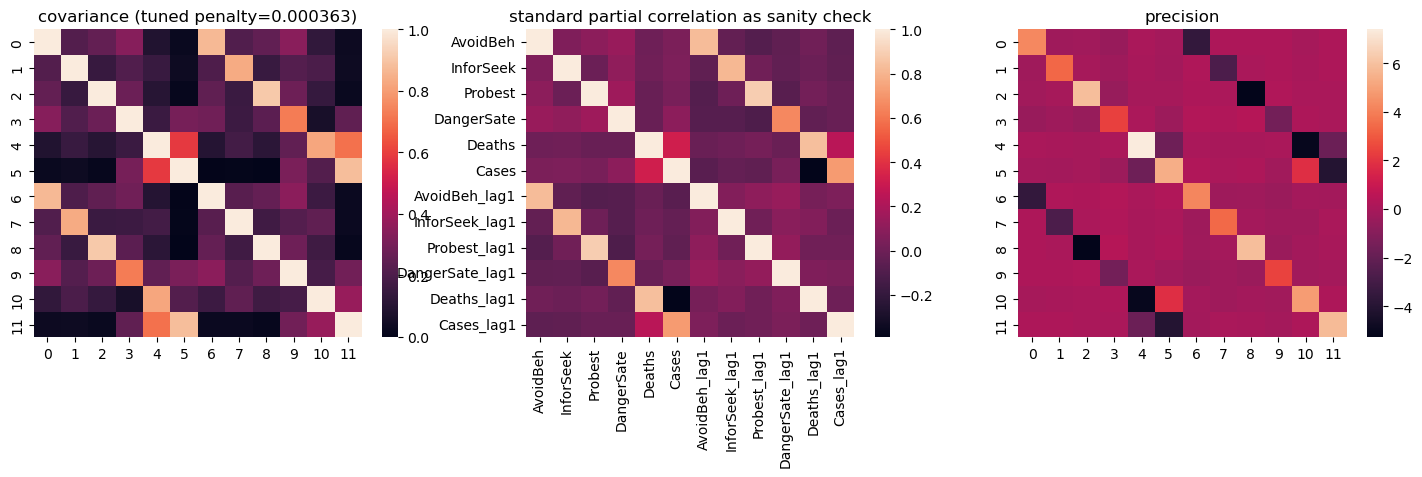

In [80]:
rdf = pd.DataFrame()
for s in np.arange(2,21): 
    s1 = df.loc[df["session"].isin([s]),].set_index("PROLIFICID").drop(columns=["session"])
    s2 = df.loc[df["session"].isin([s-1]),].set_index("PROLIFICID").drop(columns=["session"])
    s2.columns = [x+"_lag1" for x in s2.columns]
    rdf = pd.concat([rdf, s1.join(s2)])
rdf

model = QuicGraphicalLassoCV(
    #lam = 0.1,#int or np.ndarray,  # Graphical lasso penalty (scalar or matrix) 
    cv = 10, 
    score_metric='log_likelihood', #'frobenius',#'log_likelihood', 

    #n_refinements=
    #mode='path'#str,               # 'default': single estimate
                            # 'path': use sequence of scaled penalties 
    #path=list,              # Sequence of penalty scales mode='path'
    #init_method=str,        # Initial covariance estimate: 'corrcoef' or 'cov'
    #auto_scale=bool,        # If True, scales penalty by 
                            # max off-diagonal entry of the sample covariance
)
m = model.fit(rdf.dropna().values)


# for comparsion calcualte partial correlation
pcor = rdf.pcorr().round(3)

f,ax = plt.subplots(1,3,figsize=(18,4))
sns.heatmap(m.covariance_, ax=ax[0])
ax[0].set_title("covariance (tuned penalty="+str(round(m.lam_,6))+")")

sns.heatmap(pcor, ax=ax[1])
ax[1].set_title("standard partial correlation as sanity check")

sns.heatmap(m.precision_, ax=ax[2])
ax[2].set_title("precision")
